## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal
from scipy import math

SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 45

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 22})

## Defining problem parameters, functions and differential equation

In [2]:
r_on = 10**4
r_off = 10**5
mu = 10**-14
D = 30 * 10**-9
v_th = 0.5 
p=10
x0 = 0.2

def U(t):
    return 5*np.sin(10*np.pi*t)

def R(x):
    return r_on*x+r_off*(1-x)
    
def f_b(t, x):
    if U(t)/R(x) < 0:
        return 1-(x-1)**(2*p)
    if U(t)/R(x) > 0:
        return 1-x**(2*p)    

def dxdt(t, x):
    if -v_th < U(t) < v_th:
        return 0
    else:
        return mu*r_on/(D**2)*U(t)/R(x)*f_b(t,x)

## Plotting sinusoidal voltage source U(t)

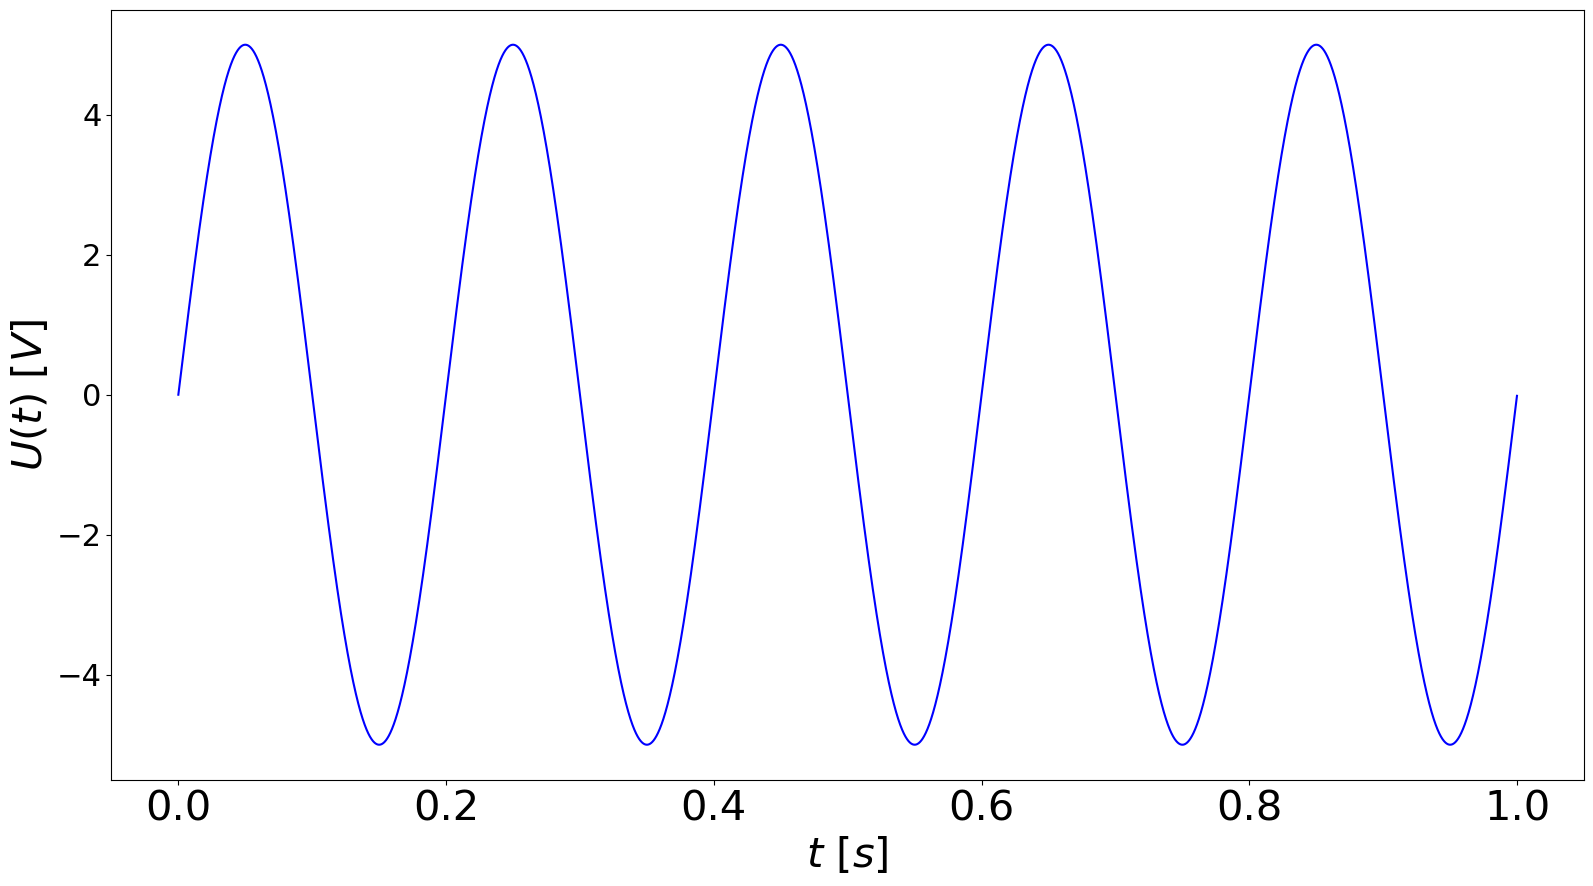

In [3]:
t = np.arange(0, 1, 0.0001)

#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.figure( figsize=(19,10) )
plt.plot(t, U(t), color = 'b')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$U(t) \ [V]$')
plt.savefig('3.1.1.jpeg', dpi=300, bbox_inches='tight')

## Solving O.D.E

In [4]:
sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)
x_sol = sol.T[0]

## Plotting x(t)

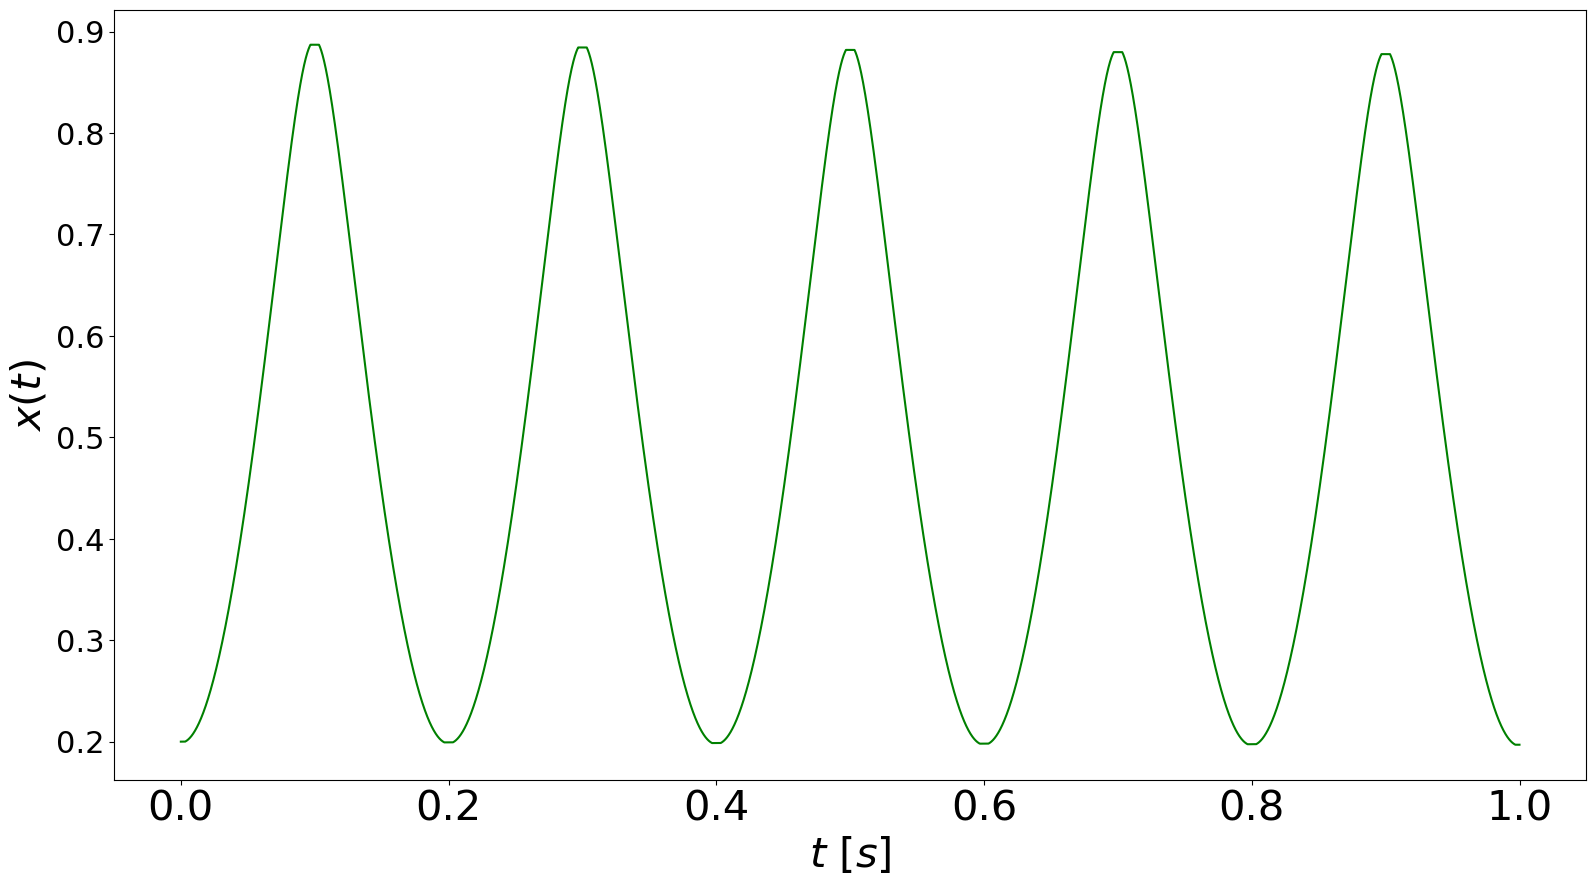

In [5]:
plt.figure( figsize=(19,10) )
plt.plot(t, x_sol, color = 'g')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$x(t)$')
plt.savefig('3.1.2.jpeg', dpi=300, bbox_inches='tight')

## Plotting I(t)

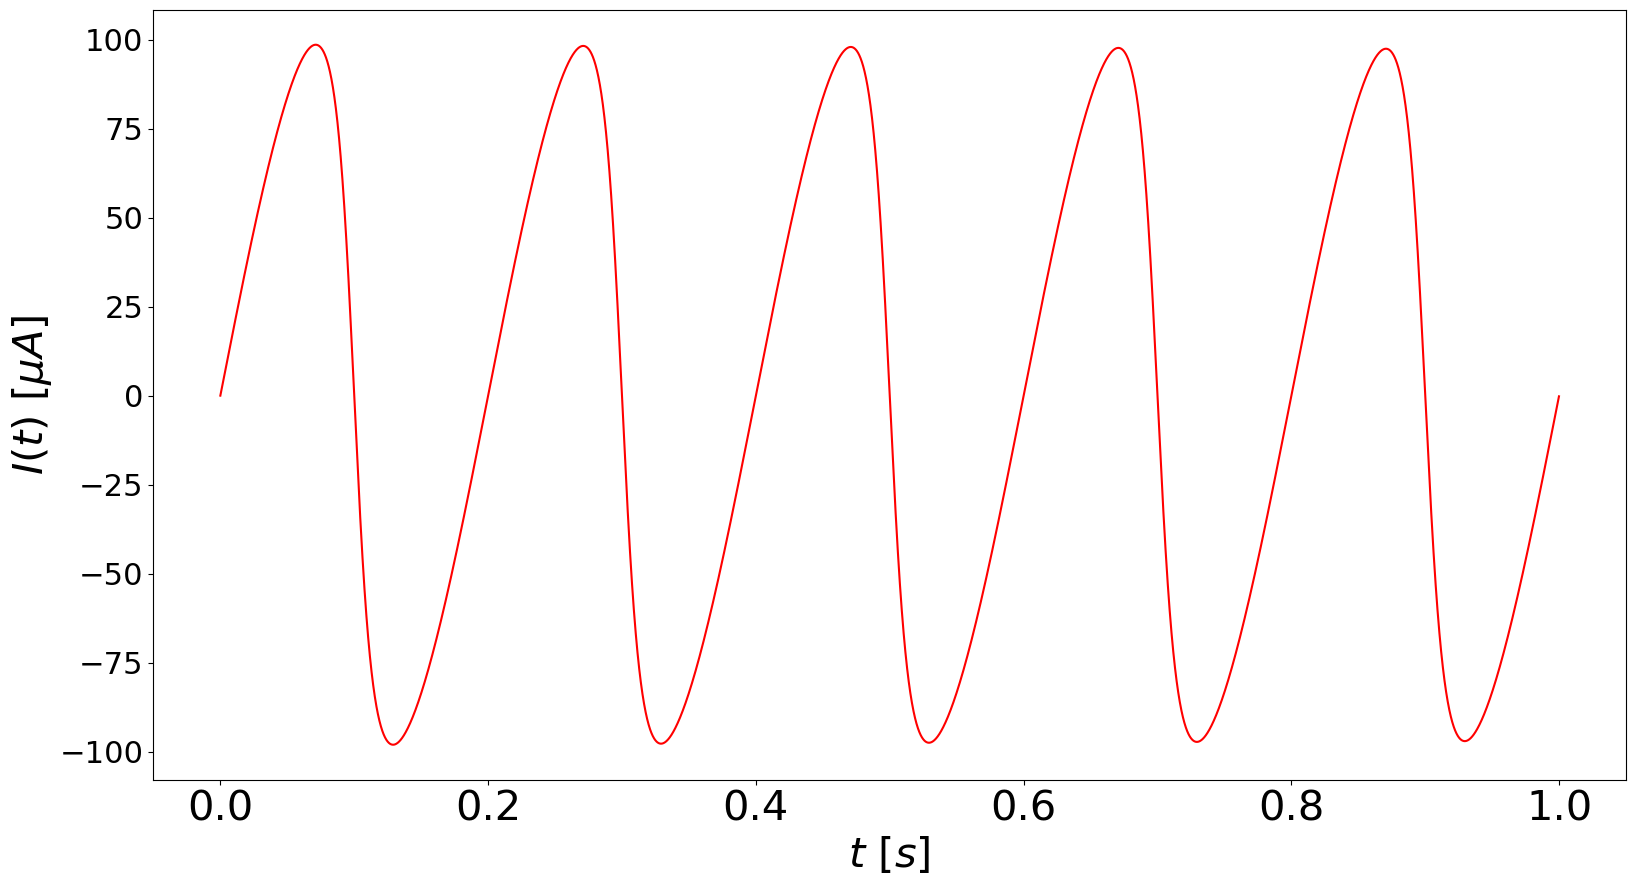

In [6]:
plt.figure( figsize=(19,10) )
plt.plot(t, U(t)/R(x_sol)*10**6, color = 'r')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$I(t) \ [\mu A]$')
plt.savefig('3.1.3.jpeg', dpi=300, bbox_inches='tight')

## Plotting I(U)

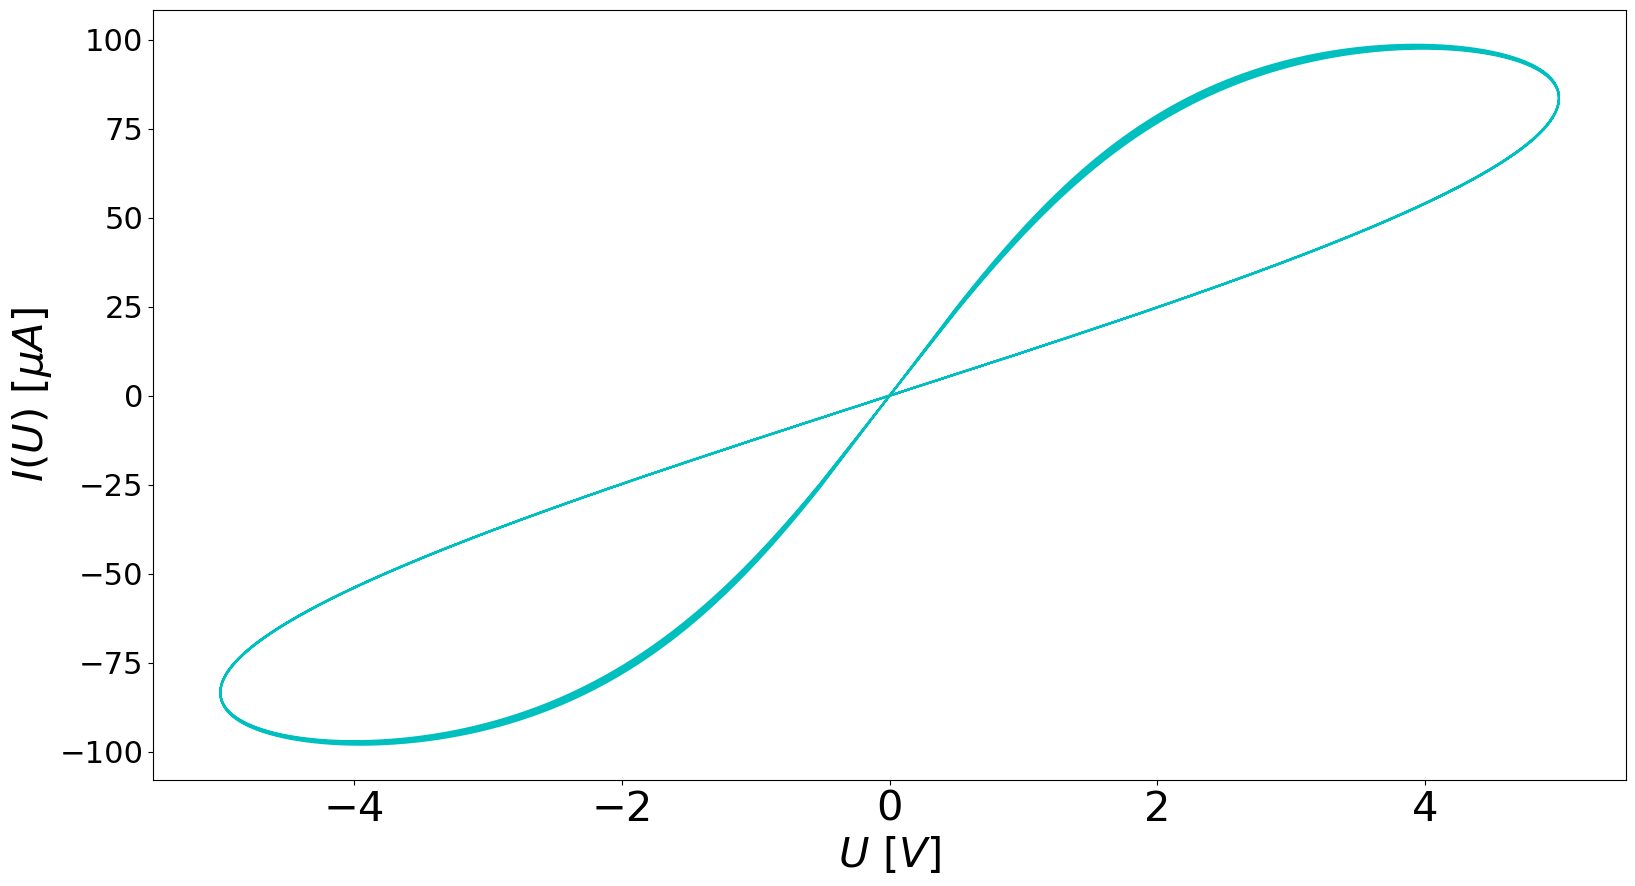

In [7]:
plt.figure( figsize=(19,10) )
plt.plot(U(t), U(t)/R(x_sol)*10**6, color = 'c')
plt.xlabel('$ U \ [V]$')
plt.ylabel('$I(U) \ [\mu A]$')
plt.savefig('3.1.4.jpeg', dpi=300, bbox_inches='tight')

## Plotting R(t)

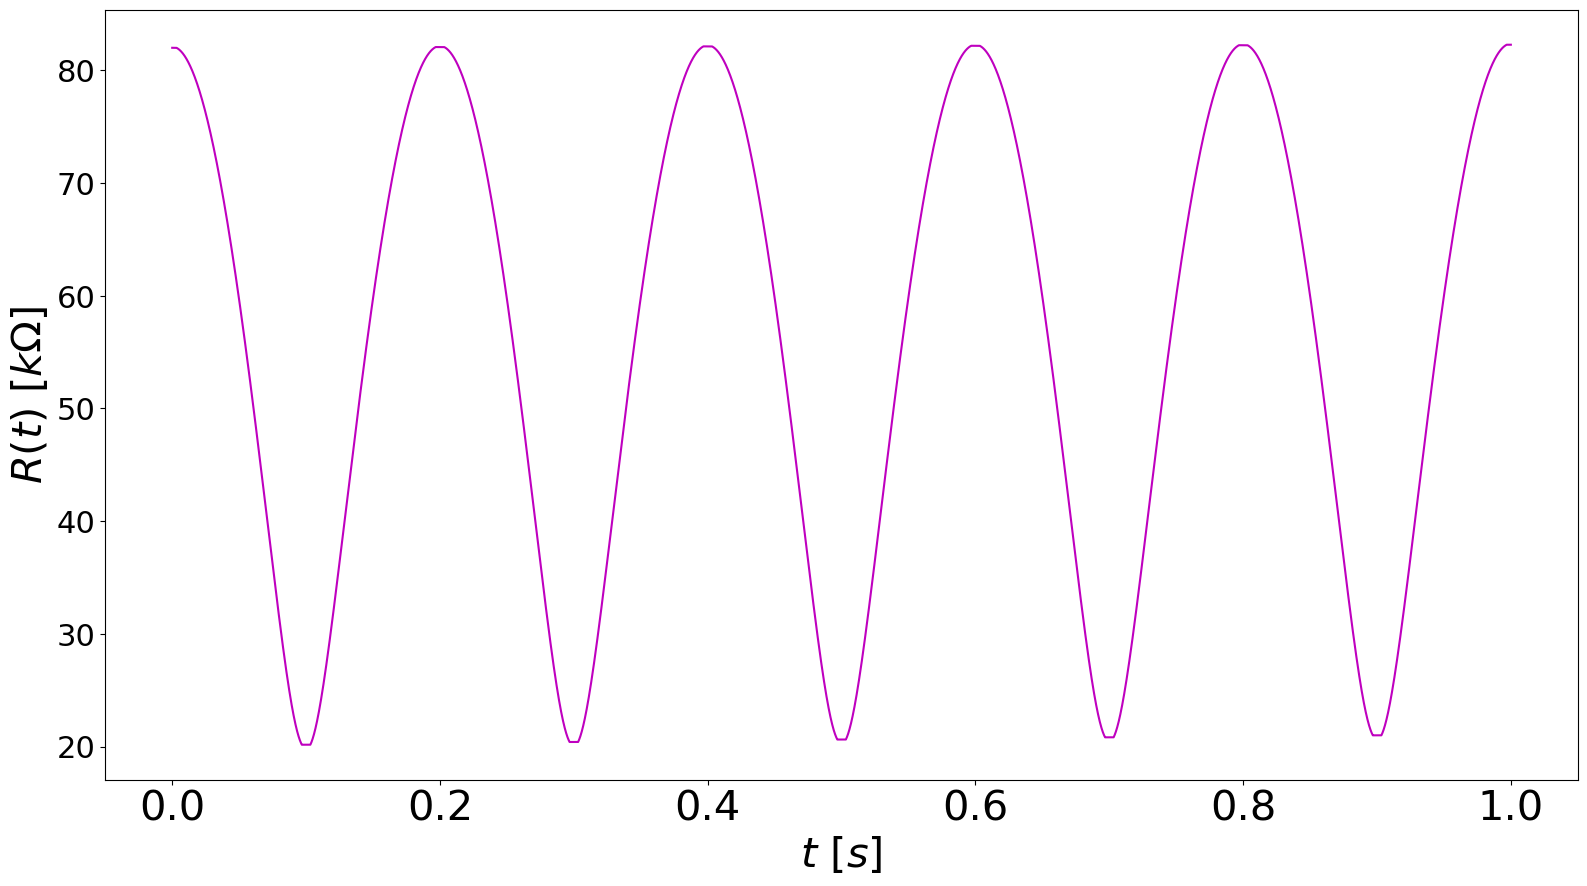

In [8]:
plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('3.1.5.jpeg', dpi=300, bbox_inches='tight')

## Defining Square Wave Voltage Source U(t)

In [9]:
def U(t):
    return 0 if math.floor(10 * t) % 2 == 0 else 0.7

def V(t):
    V=[]
    for i in t:
        V.append(U(i))
    return V

## Plotting U(t)

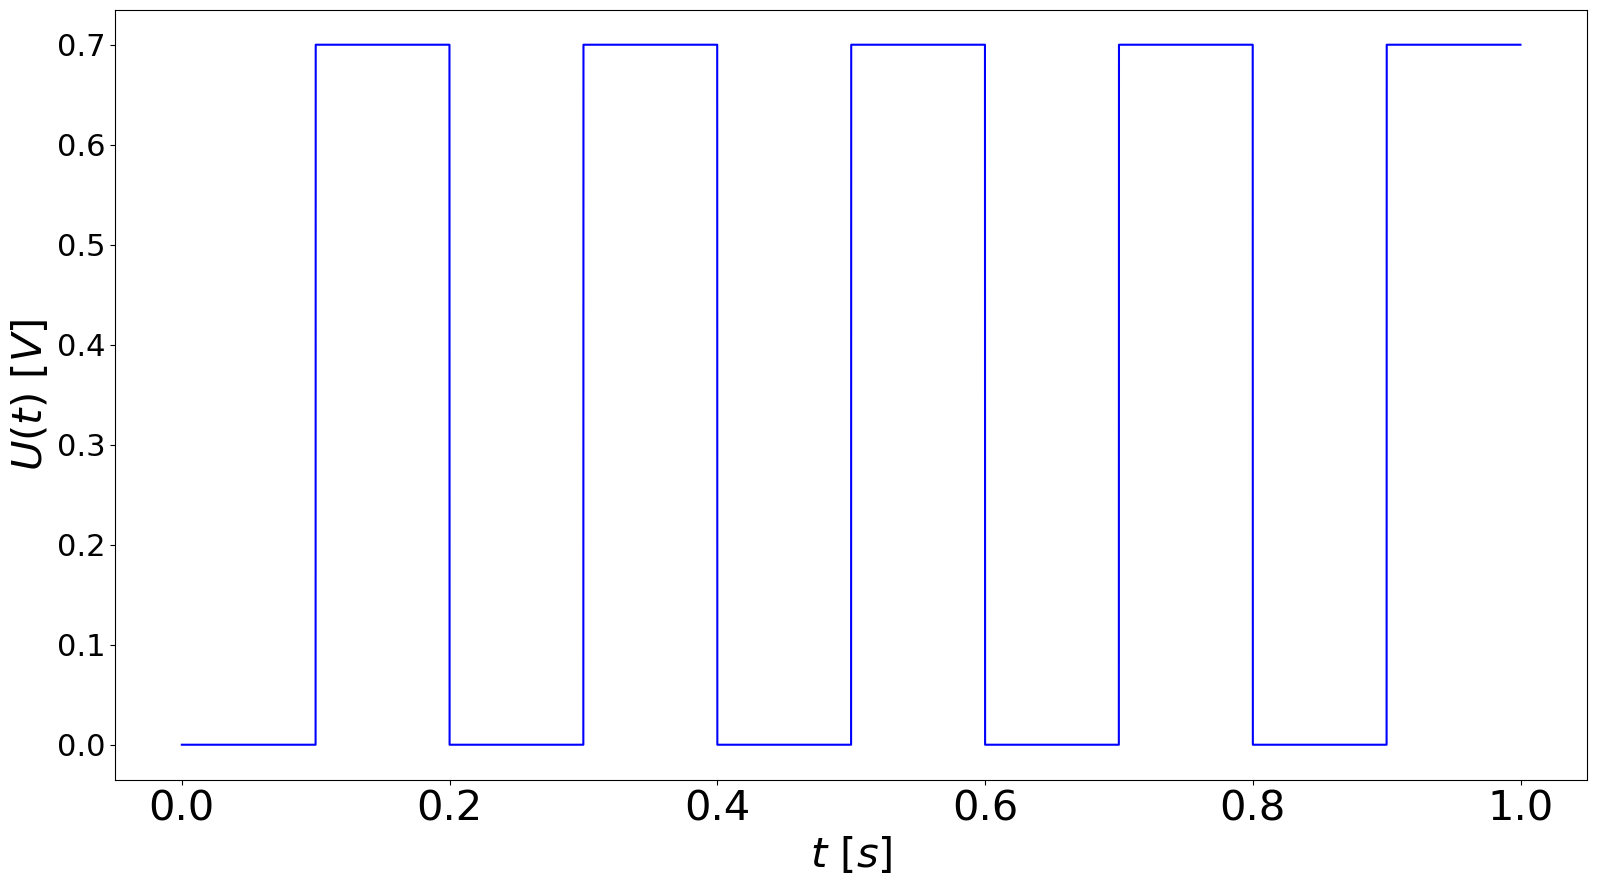

In [10]:
plt.figure( figsize=(19,10) )
plt.plot(t, V(t), color = 'b')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$U(t) \ [V]$')
plt.savefig('4.1.1.jpeg', dpi=300, bbox_inches='tight')

## Solving O.D.E.

In [11]:
sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)

x_sol = sol.T[0]

## Plotting x(t)

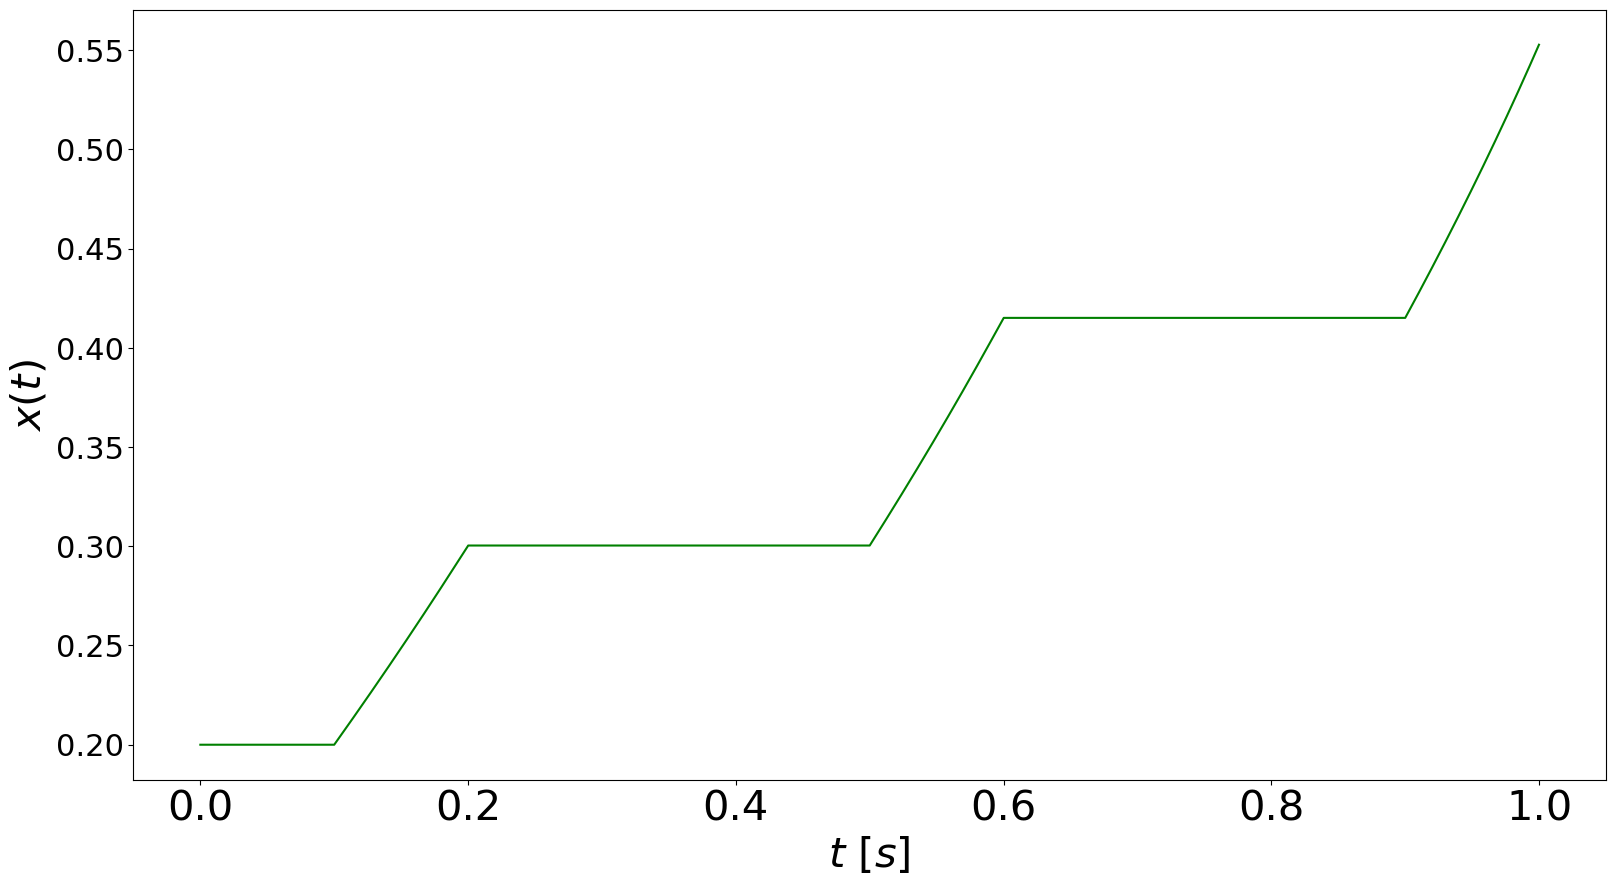

In [12]:
plt.figure( figsize=(19,10) )
plt.plot(t, x_sol, color = 'g')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$x(t)$')
plt.savefig('4.1.2.jpeg', dpi=300, bbox_inches='tight')

## Plotting I(t)

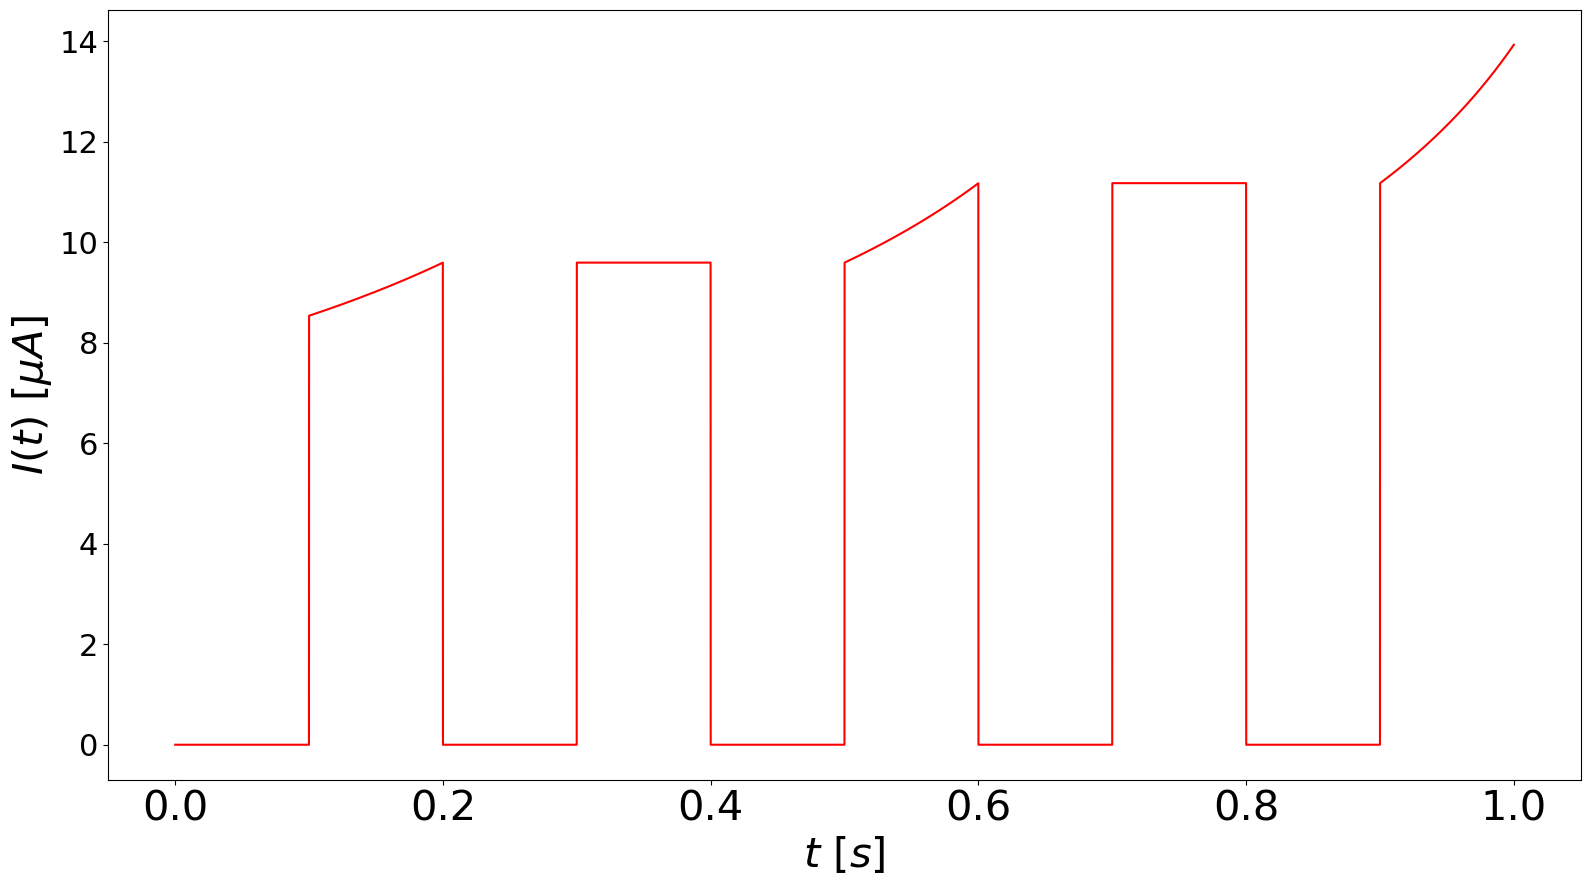

In [13]:
plt.figure( figsize=(19,10) )
plt.plot(t, V(t)/R(x_sol)*10**6, color = 'r')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$I(t) \ [\mu A]$')
plt.savefig('4.1.3.jpeg', dpi=300, bbox_inches='tight')

## Plotting I(U)

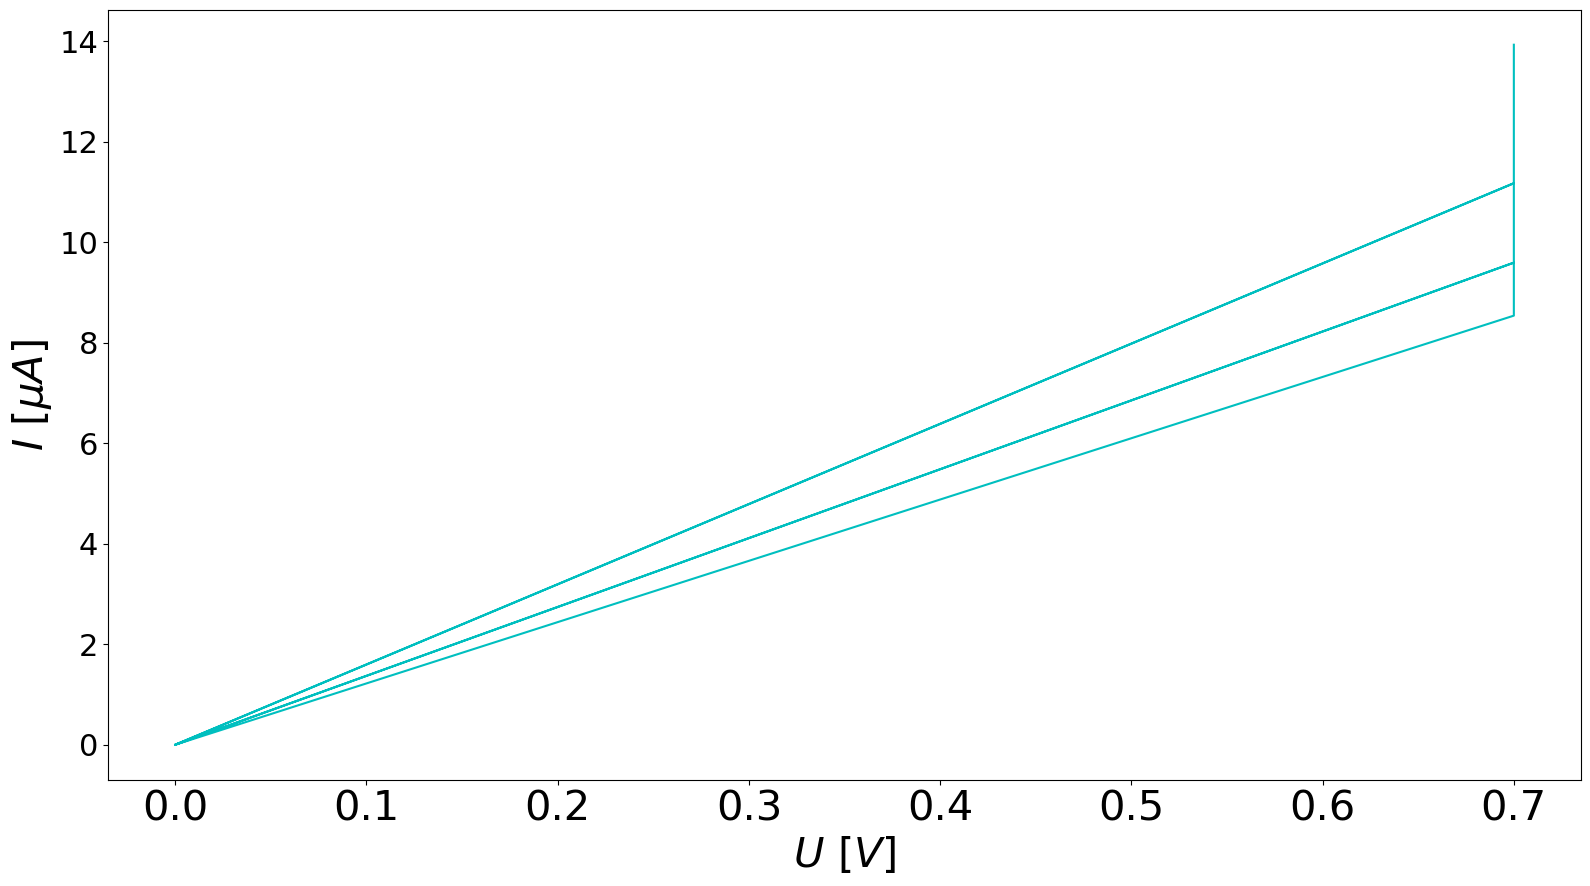

In [14]:
plt.figure( figsize=(19,10) )
plt.plot(V(t), V(t)/R(x_sol)*10**6, color = 'c')
plt.xlabel('$ U \ [V]$')
plt.ylabel('$I \ [\mu A]$')
plt.savefig('4.1.4.jpeg', dpi=300, bbox_inches='tight')

## Plotting R(t)

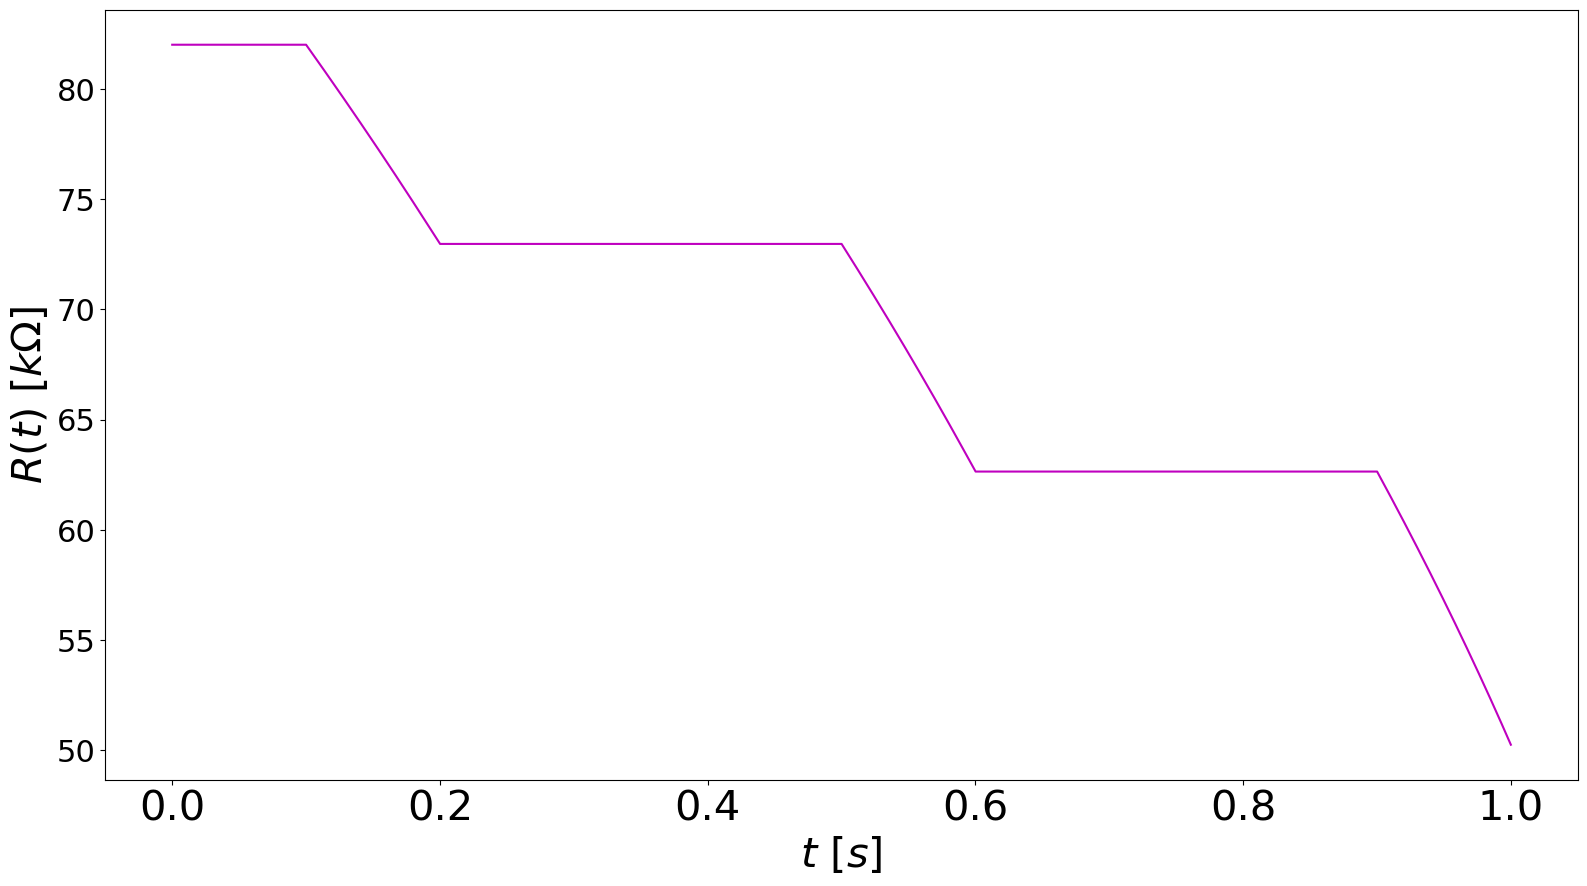

In [15]:
plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('4.1.5.jpeg', dpi=300, bbox_inches='tight')

## Values $a$ and $b$ that don’t change the resistance curve for $V_{LOW} \in \ ]a, b[ $

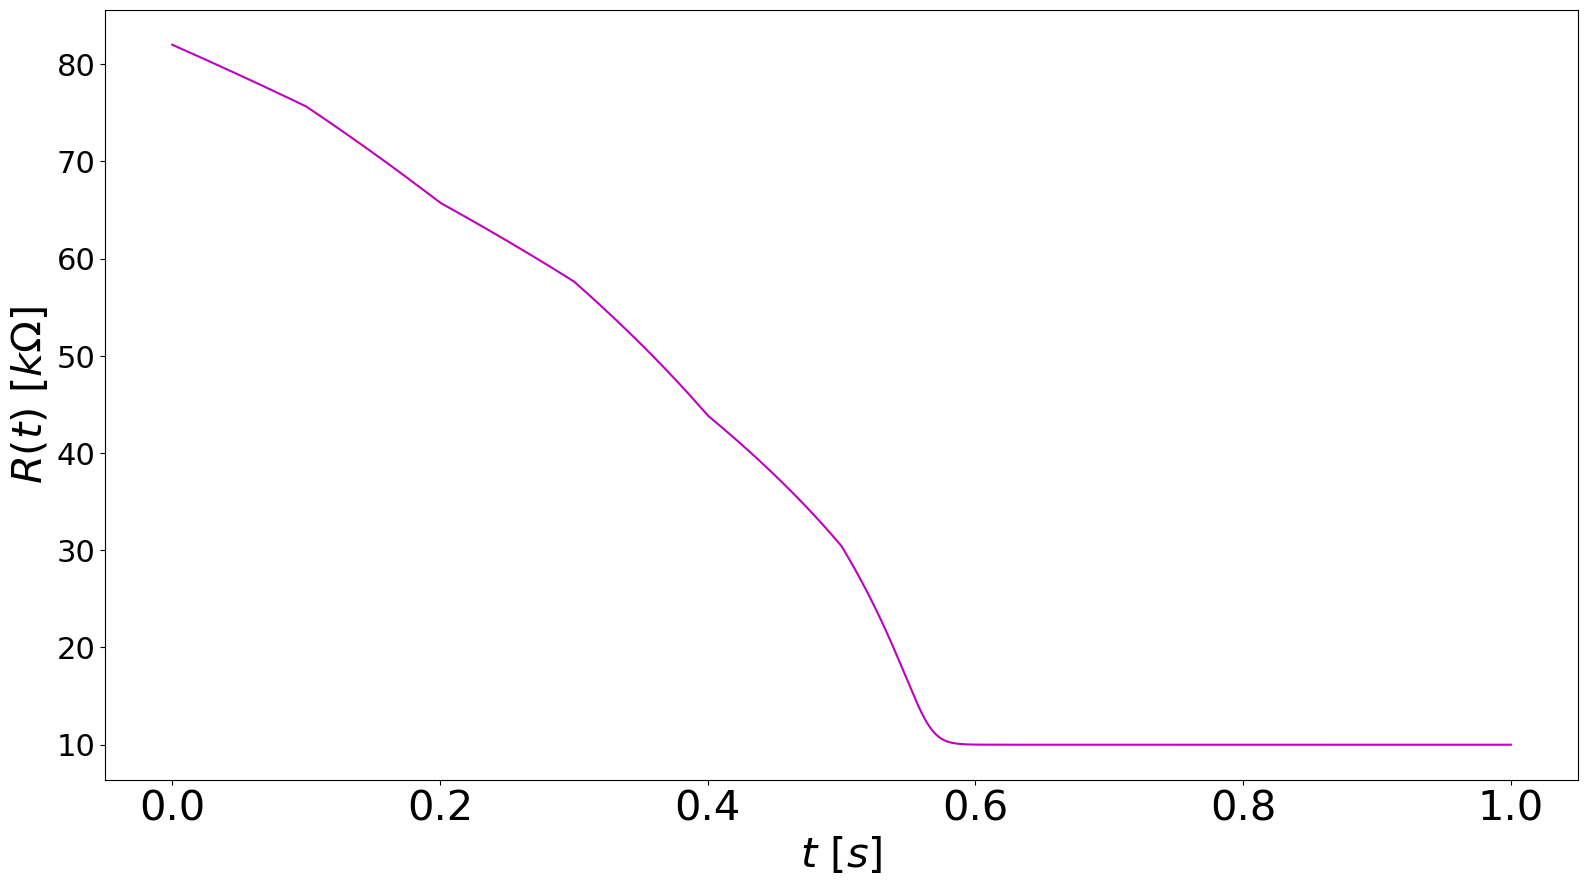

In [16]:
def U(t):
    return 0.5 if math.floor(10 * t) % 2 == 0 else 0.7

sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)
x_sol = sol.T[0]

plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('4.3.jpeg', dpi=300, bbox_inches='tight')

## Testing if the value $b$ is $+V_{TH}$

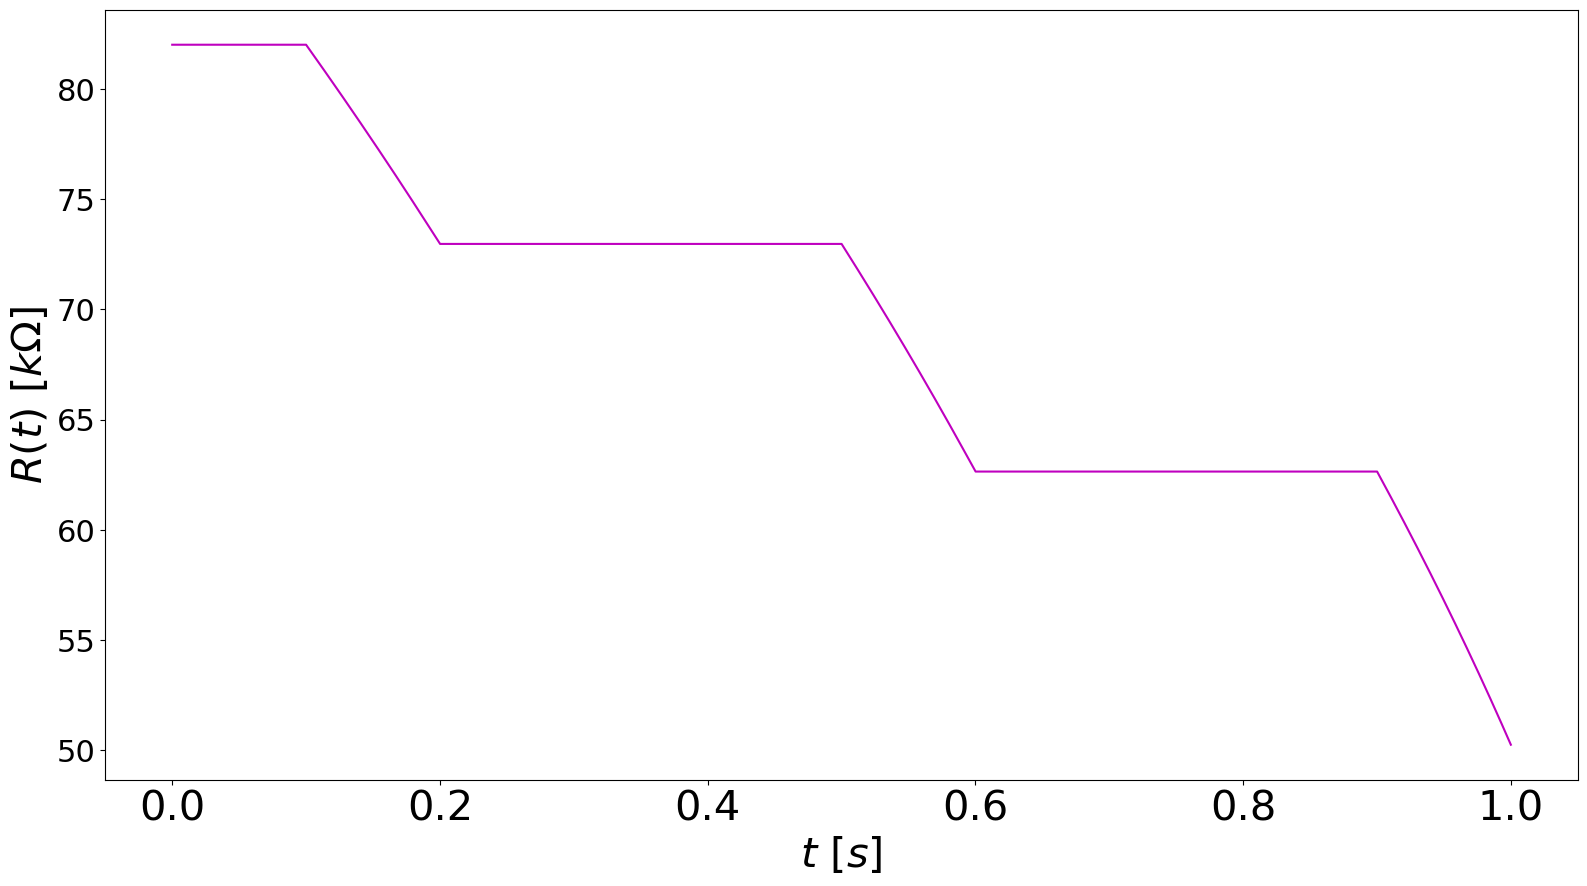

In [17]:
v_th = 0.6

sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)
x_sol = sol.T[0]

plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('4.3.1.jpeg', dpi=300, bbox_inches='tight')

## Defining Pulse Voltage Source U(t)

In [18]:
t_cut = 0.5
v_th = 0.5

def U(t):
    return 0.6 if t < t_cut else 0.3

def V(t):
    V=[]
    for i in t:
        V.append(U(i))
    return V

## Plotting U(t)

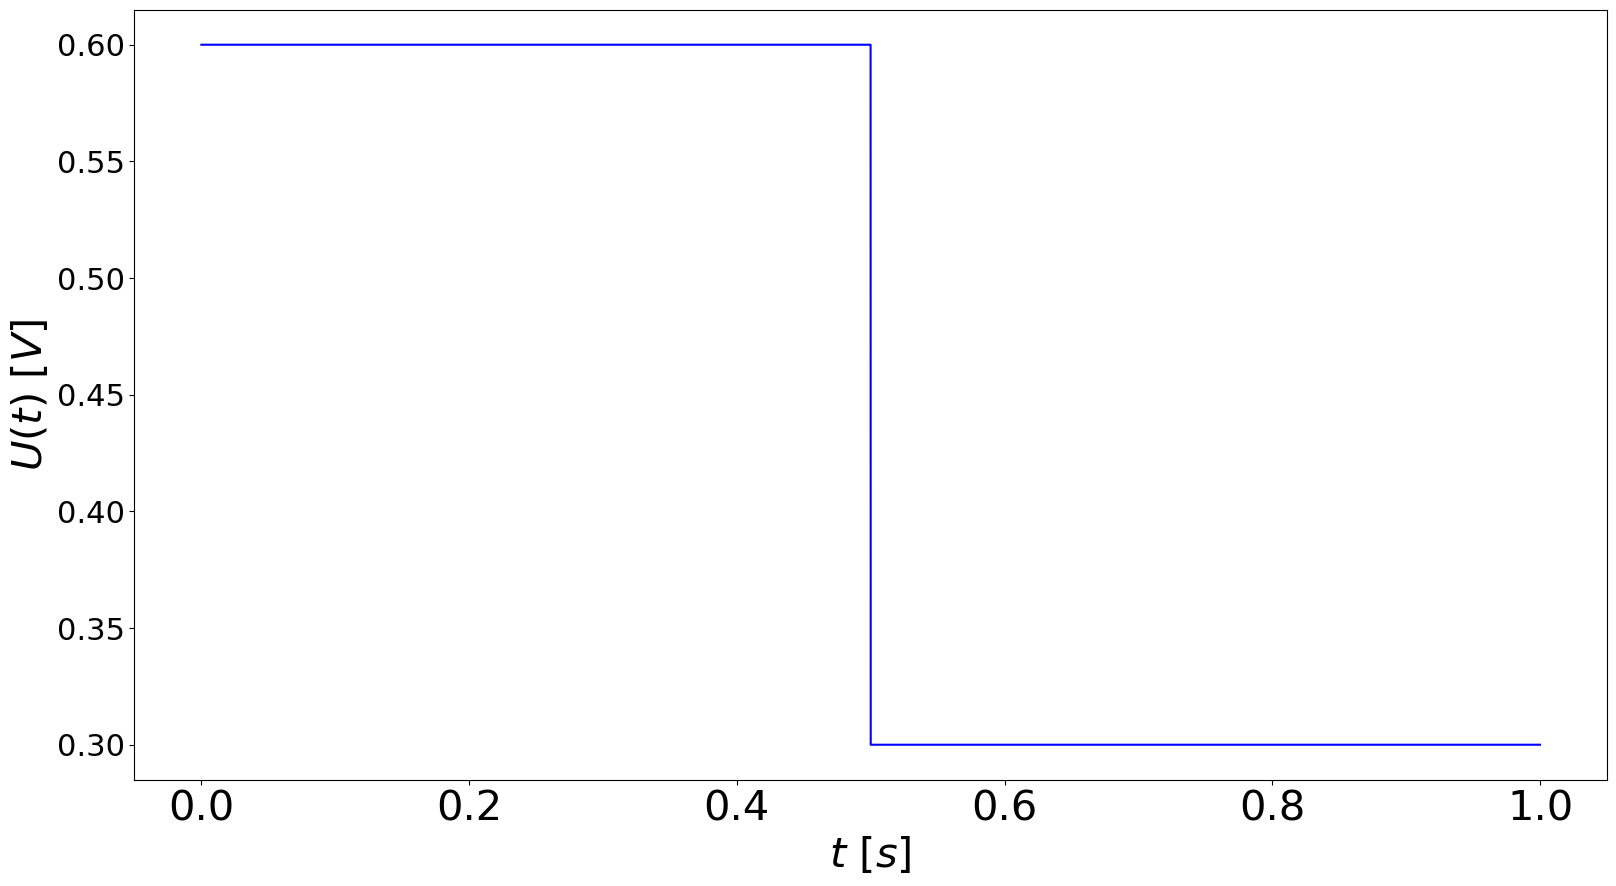

In [19]:
plt.figure( figsize=(19,10) )
plt.plot(t, V(t), color = 'b')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$U(t) \ [V]$')
plt.savefig('5.1.1.jpeg', dpi=300, bbox_inches='tight')

## Solving O.D.E

In [20]:
sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)

x_sol = sol.T[0]

## Plotting x(t)

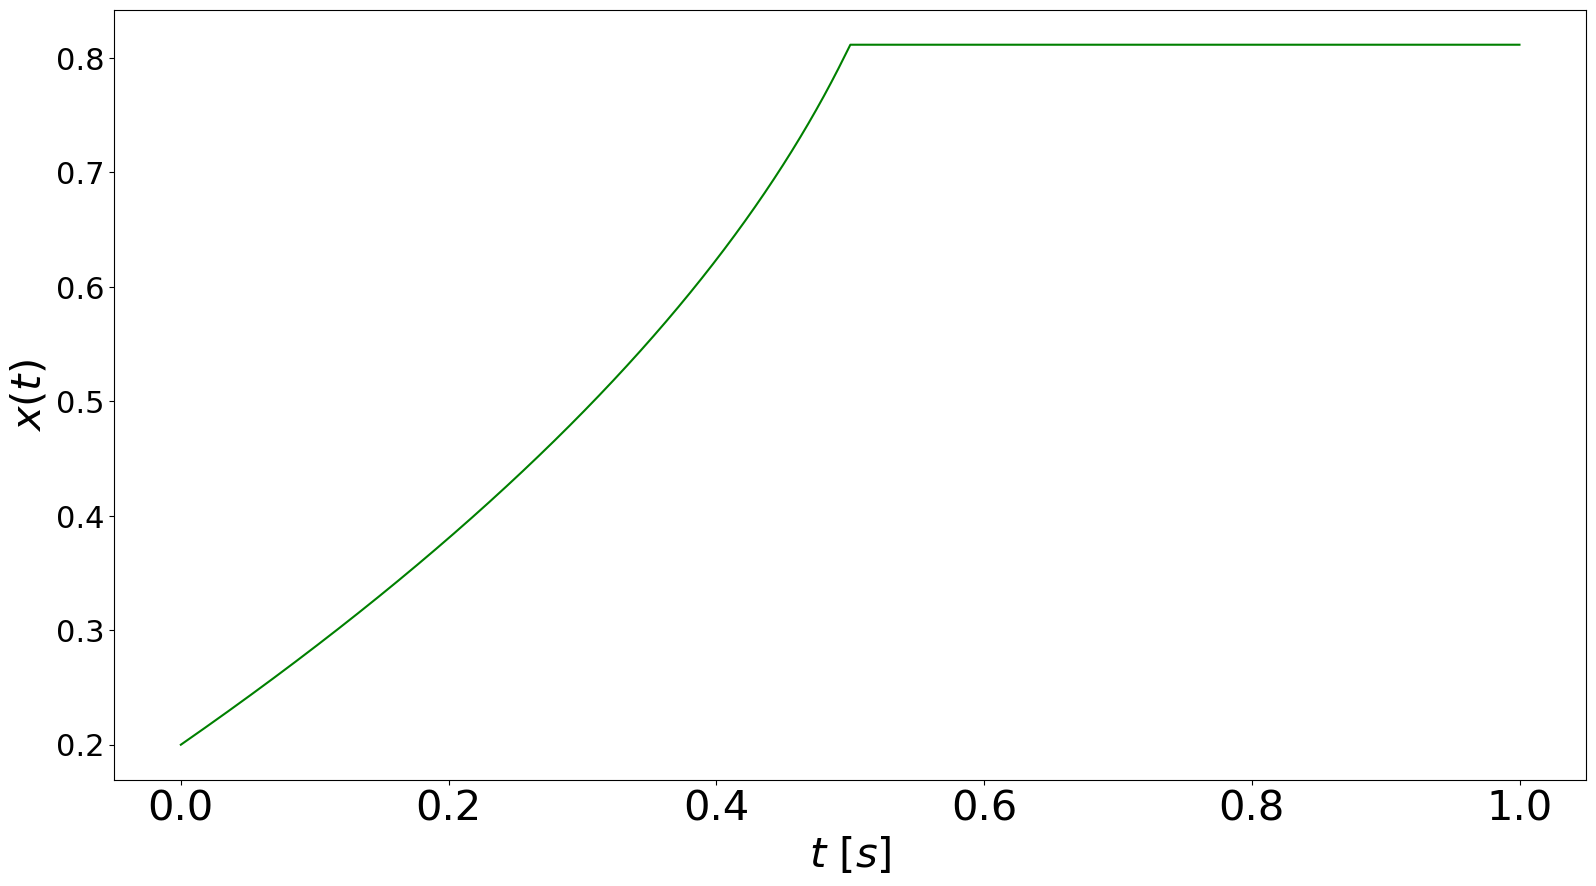

In [21]:
plt.figure( figsize=(19,10) )
plt.plot(t, x_sol, color = 'g')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$x(t)$')
plt.savefig('5.1.2.jpeg', dpi=300, bbox_inches='tight')

## Plotting I(t)

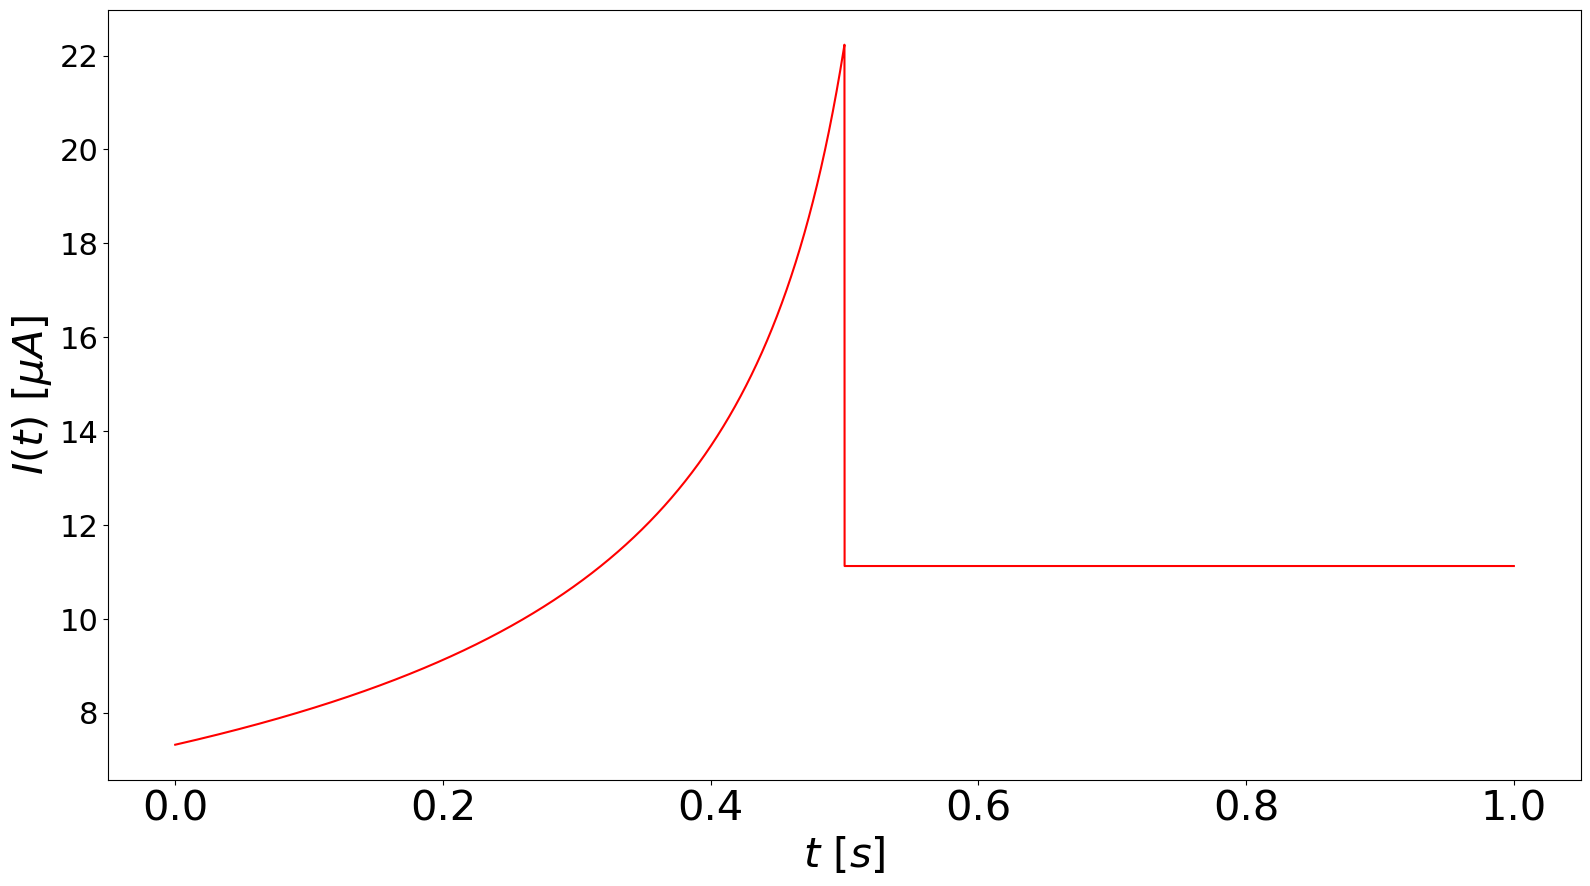

In [22]:
plt.figure( figsize=(19,10) )
plt.plot(t, V(t)/R(x_sol)*10**6, color = 'r')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$I(t) \ [\mu A]$')
plt.savefig('5.1.3.jpeg', dpi=300, bbox_inches='tight')

## Plotting I(U)

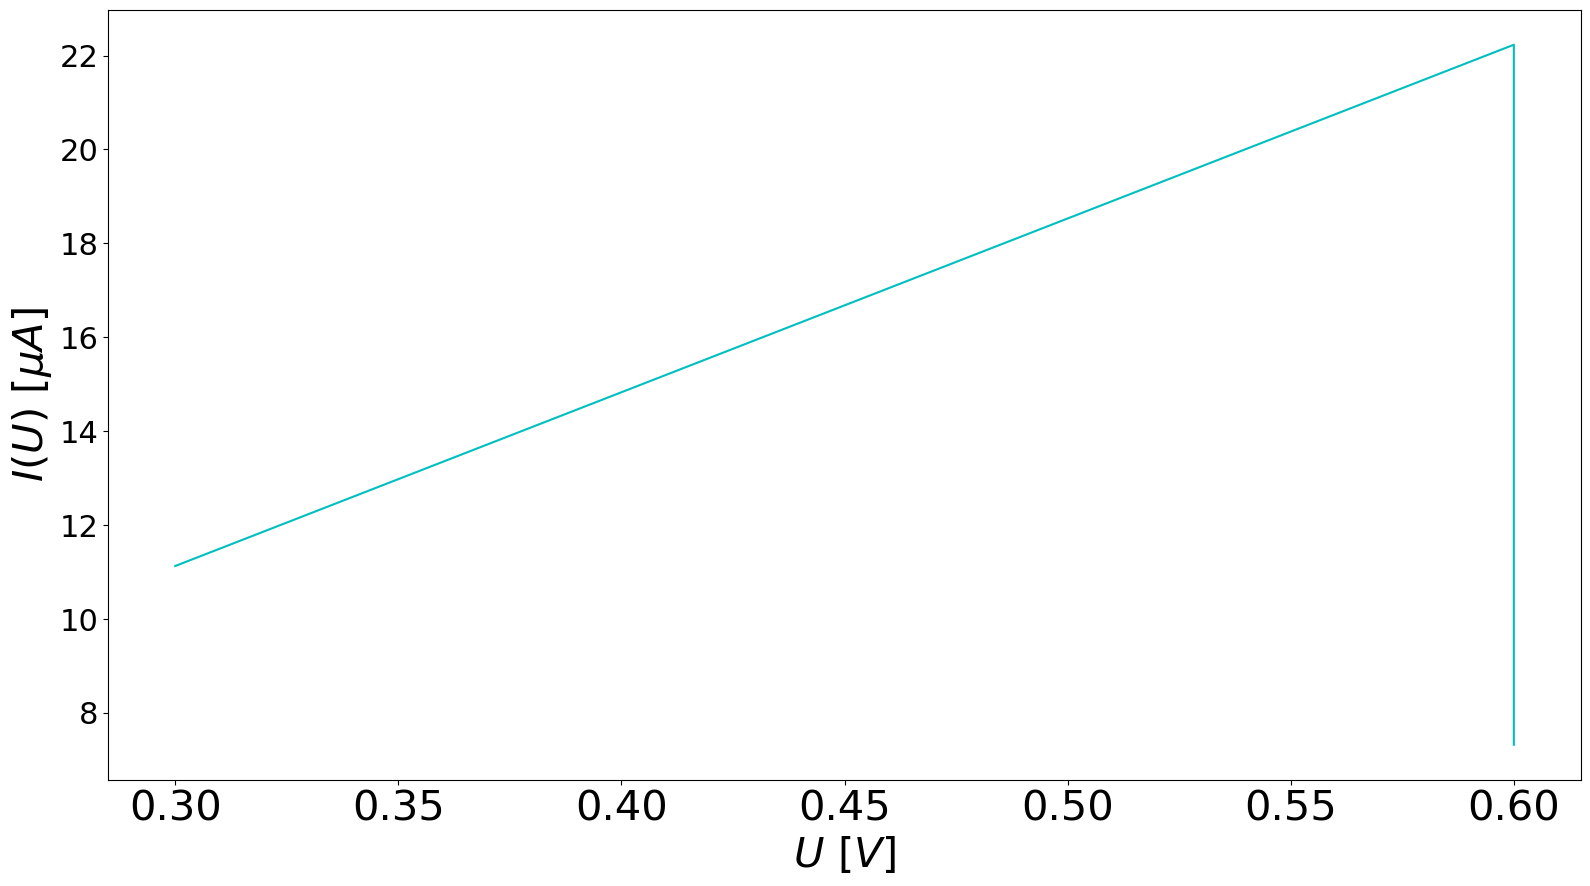

In [23]:
plt.figure( figsize=(19,10) )
plt.plot(V(t), V(t)/R(x_sol)*10**6, color = 'c')
plt.ylabel('$ I(U) \ [\mu A]$')
plt.xlabel('$U \ [V]$')
plt.savefig('5.1.4.jpeg', dpi=300, bbox_inches='tight')

## Plotting R(t)

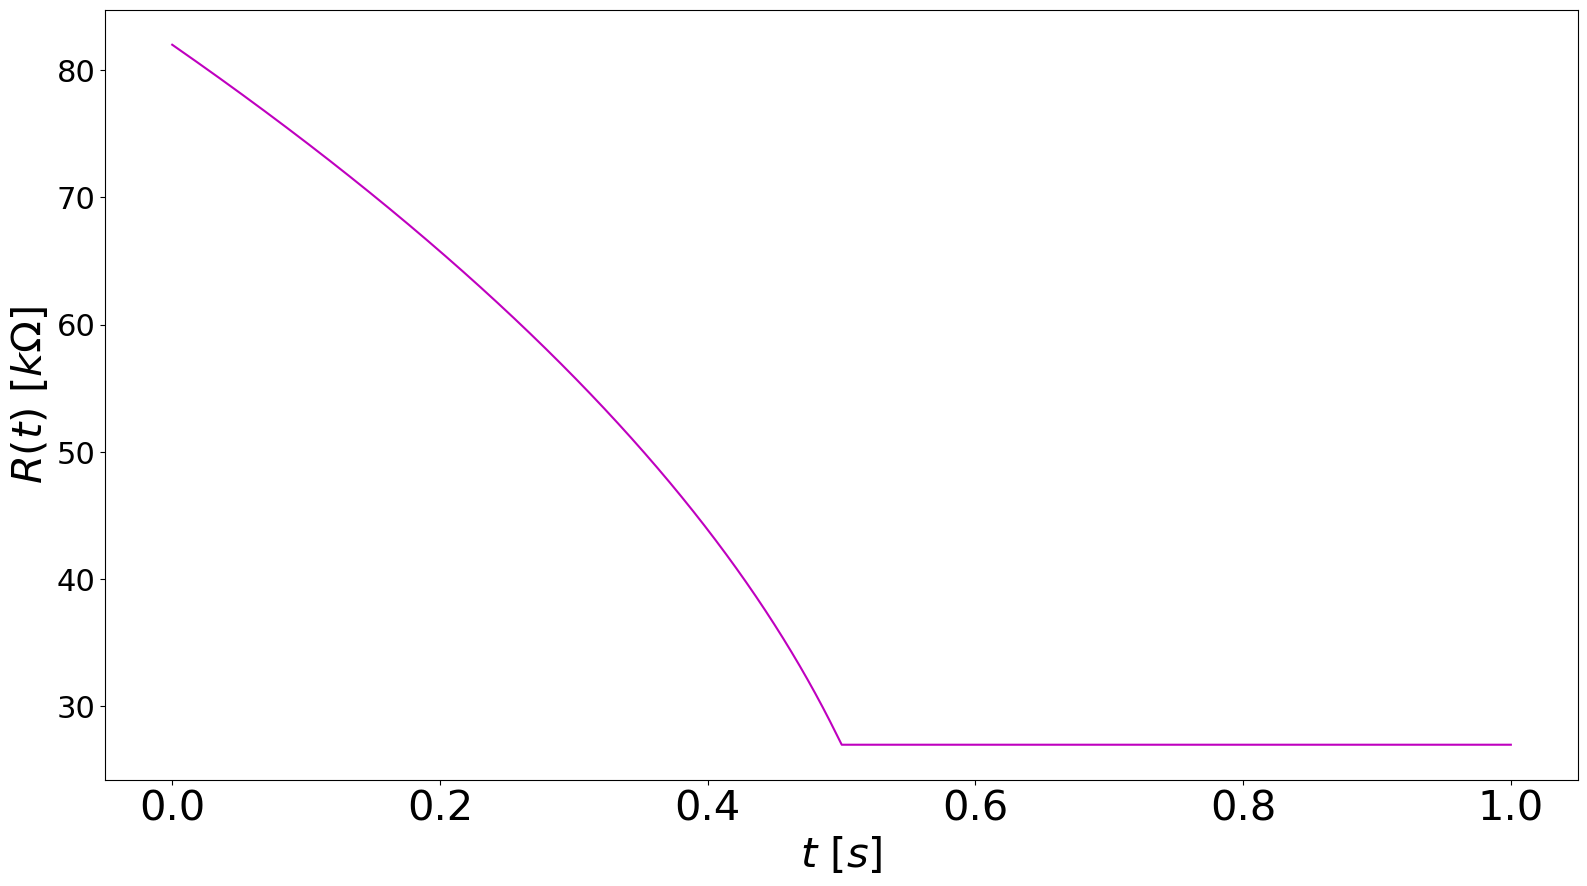

In [24]:
plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('5.1.5.jpeg', dpi=300, bbox_inches='tight')

## Finding $t_{cut}$ value to obtain $ R = 50k \Omega $

In [25]:
index = np.argmin(np.abs(np.array(R(x_sol))-50000)) #finding the closest value of R to 50000
                
t_cut = t[index]
print(t_cut,"s")

0.35200000000000004 s


## Plotting R(t) with new $t_{cut}$

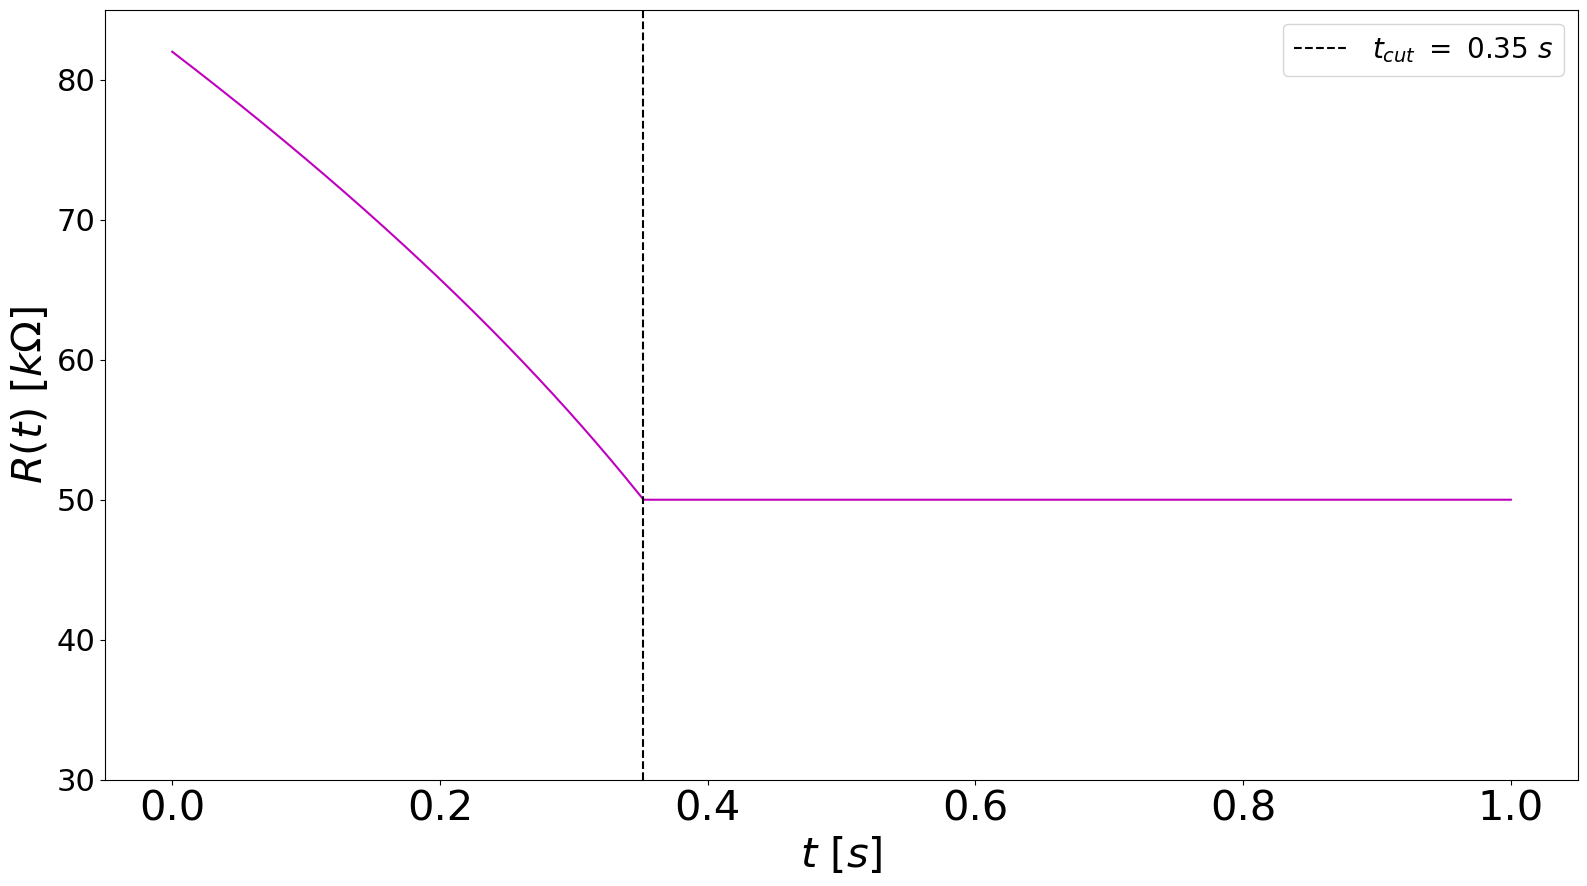

In [26]:
sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)
x_sol = sol.T[0]

plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.axvline(x = t_cut, c= 'k', ls ="--", label = '$t_{cut}\ = \ 0.35 \ s$')
plt.legend(loc='best')
plt.ylim(30, 85)
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('5.2.jpeg', dpi=300, bbox_inches='tight')

## Voltage Source Curve to increase R to $50k\Omega$

In [65]:

def U(t):
    return -0.6 if t < t_cut else -0.3

def V(t):
    V=[]
    for i in t:
        V.append(U(i))
    return V

x0 = 0.8

sol = odeint(dxdt, y0 = x0, t=t, tfirst=True)

x_sol = sol.T[0]

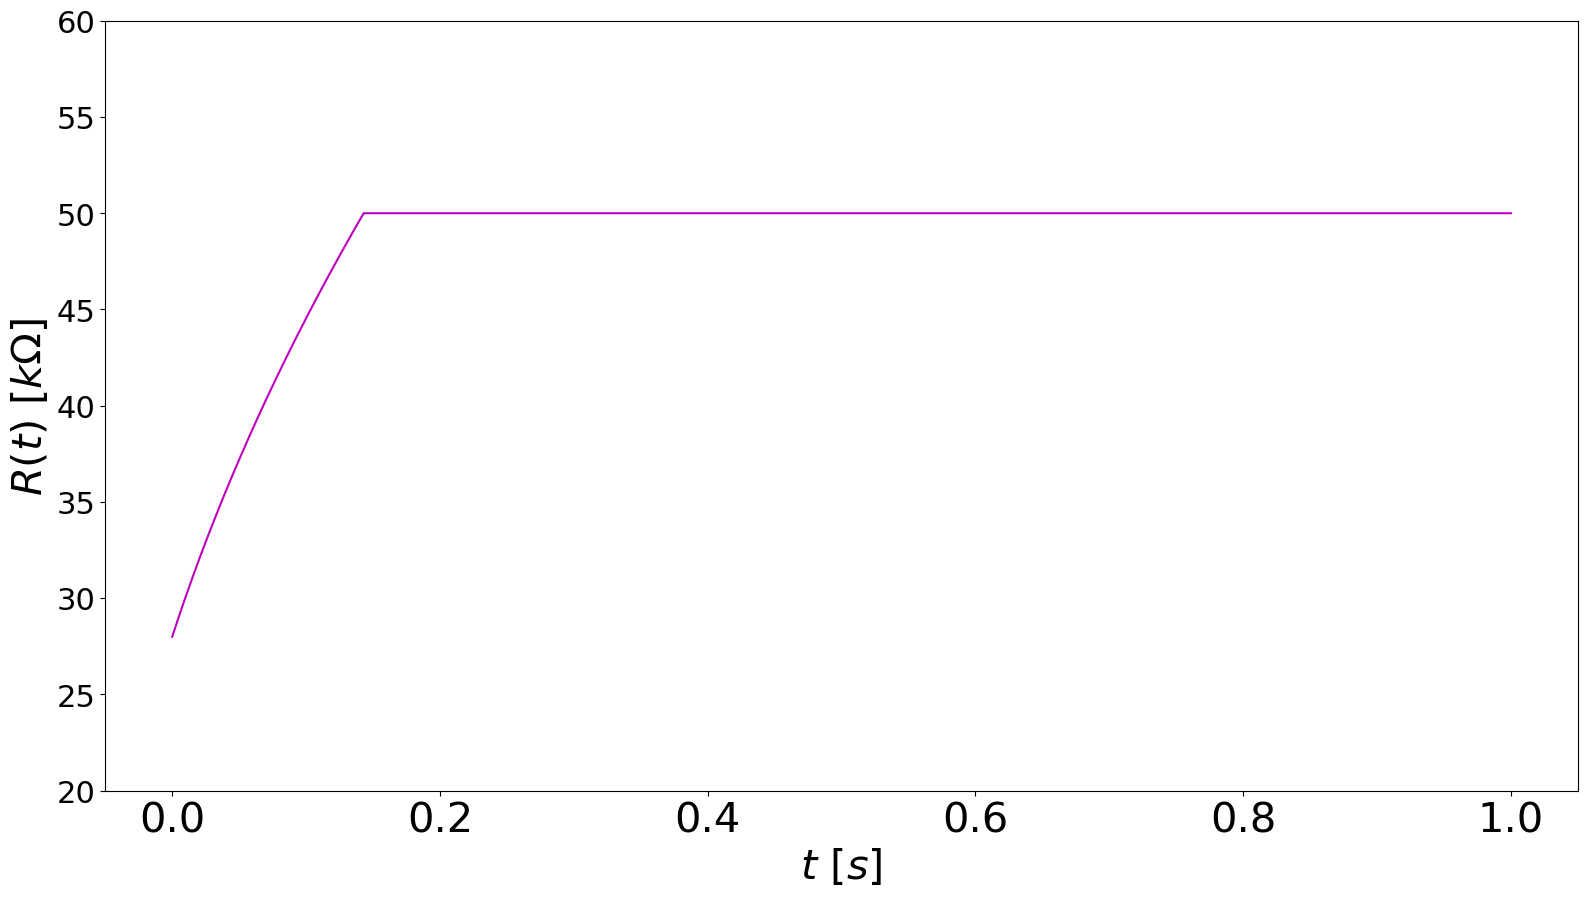

In [75]:
plt.figure( figsize=(19,10) )
plt.plot(t, R(x_sol)/10**3, color = 'm')
plt.ylim(20, 60)
plt.xlabel('$ t \ [s]$')
plt.ylabel('$R(t) \ [k\Omega]$')
plt.savefig('6.jpeg', dpi=300, bbox_inches='tight')

## Finding $t_{cut}$ value to obtain $ R = 50k \Omega $

In [73]:
index = np.argmin(np.abs(np.array(R(x_sol))-50000)) #finding the closest value of R to 50000
                
t_cut = t[index]
print(t_cut,"s")

0.1431 s


## Plotting Voltage Source Curve Solution

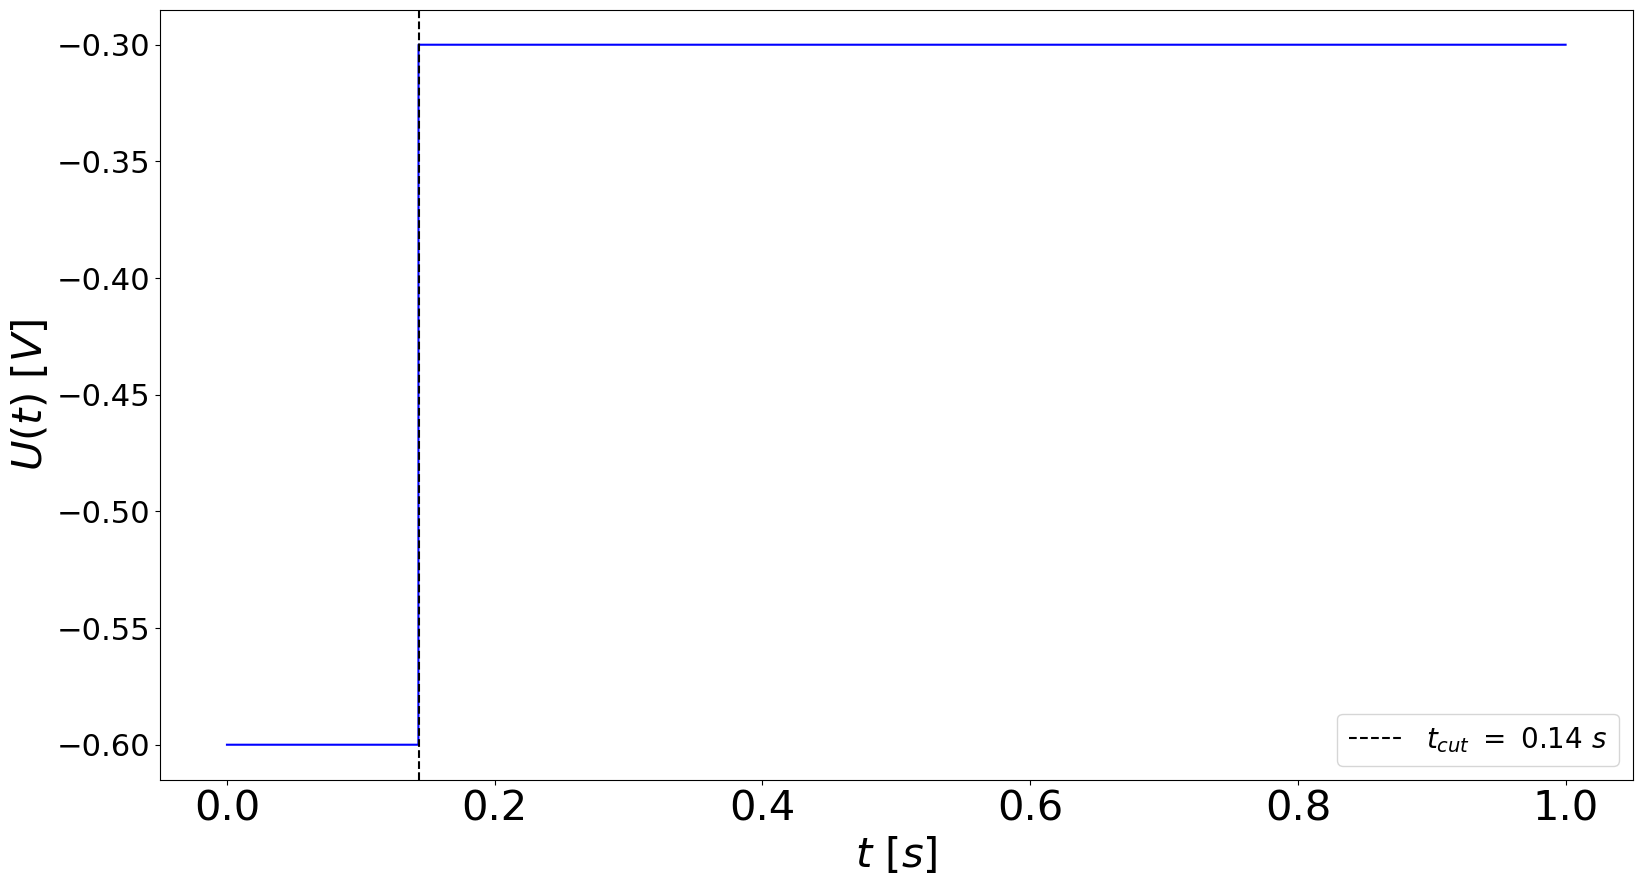

In [76]:
plt.figure( figsize=(19,10) )
plt.plot(t, V(t), color = 'b')
plt.axvline(x = t_cut, c= 'k', ls ="--", label = '$t_{cut}\ = \ 0.14 \ s$')
plt.legend(loc='best')
plt.xlabel('$ t \ [s]$')
plt.ylabel('$U(t) \ [V]$')
plt.savefig('6.1.jpeg', dpi=300, bbox_inches='tight')